Import libraries 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [3]:
df=pd.read_csv("VNL2023.csv")

View first 5 Rows

In [4]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


View last 5 Rows

In [5]:
df.tail()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
126,Graven Leonard,Germany,19,0.0,0.0,0.0,0.0,5.92,1.92,L
127,Balaso Fabio,Italy,28,0.0,0.0,0.0,0.0,10.00,5.00,L
128,Nacsimento Maique Reis,Brazil,26,0.0,0.0,0.0,0.0,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.0,0.0,0.0,0.0,4.25,3.25,L
130,Salparov Teodor,Bulgaria,41,0.0,0.0,0.0,0.0,5.00,3.75,L


Dataset Shape

In [6]:
df.shape

(131, 10)

Statistical Summary

In [7]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


Missing Values Check

In [8]:
df.isnull().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

Duplicate Rows check

In [10]:
df.duplicated().sum()

np.int64(0)

Correlation Matrix

In [11]:
numeric_cols=df.select_dtypes(include= ['int', 'float']).columns
corr_matrix= df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Correlation Heatmap

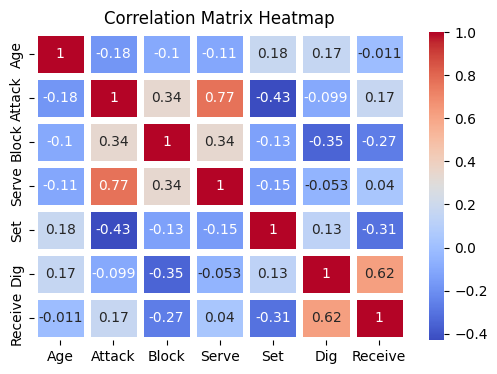

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm", linewidths=5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Position Distribution

In [16]:
position_counts=df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

Position Distribution Pie Chart

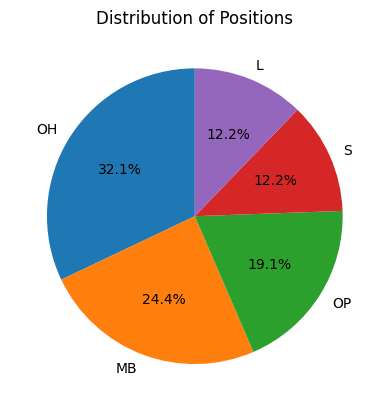

In [18]:
plt.pie(position_counts, labels= position_counts.index, autopct="%1.1f%%",startangle= 90)
plt.title("Distribution of Positions")
plt.show()

Average Attack by Country

In [19]:
avg_attack_by_country= df.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending=False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

Average Attack by Country Bar Chart

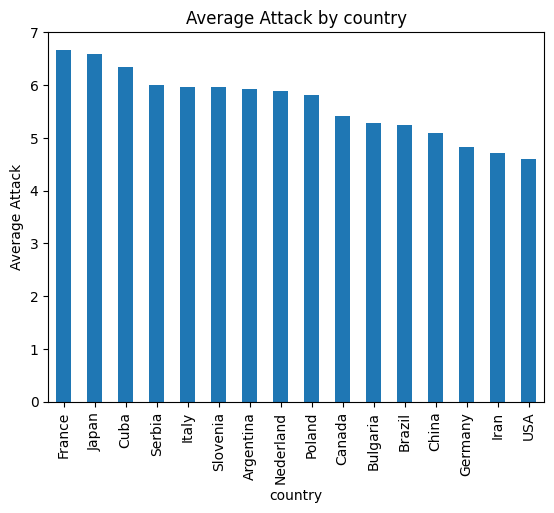

In [21]:
avg_attack_by_country.sort_values(ascending=False).plot(kind= "bar")
plt.title("Average Attack by country")
plt.xlabel("country")
plt.ylabel("Average Attack")
plt.show()

Average Serve by Age

In [23]:
avg_serve_by_age= df.groupby("Age")["Serve"].mean()
avg_serve_by_age.sort_values(ascending= False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

Top 10 Max Attack by Country and Position

In [26]:
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending=False, by ="Attack").tail(10)

,Country,Position,Attack
25,Cuba,L,0.0
30,France,L,0.0
45,Italy,L,0.0
60,Poland,L,0.0
50,Japan,L,0.0
55,Nederland,L,0.0
70,Slovenia,L,0.0
65,Serbia,L,0.0
64,Poland,S,0.0
74,USA,L,0.0


 Total Digs by Country

In [28]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

Block vs Receive Scatter Plot

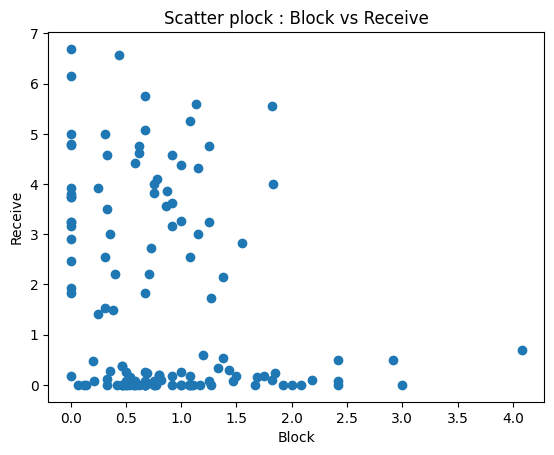

In [30]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter plock : Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

Serve Value Distribution Boxplot

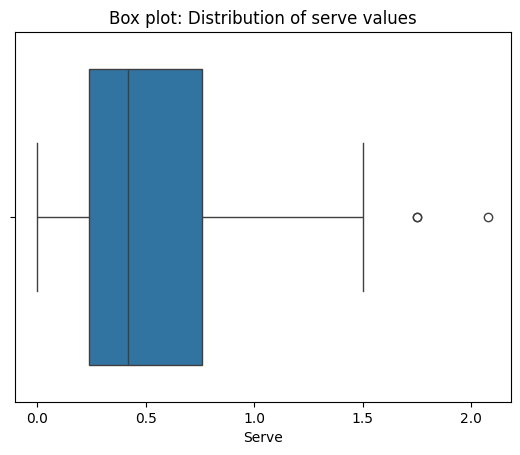

In [31]:
sns.boxplot(x=df["Serve"])
plt.title("Box plot: Distribution of serve values")
plt.xlabel("Serve")
plt.show()

Age Distribution Histogram

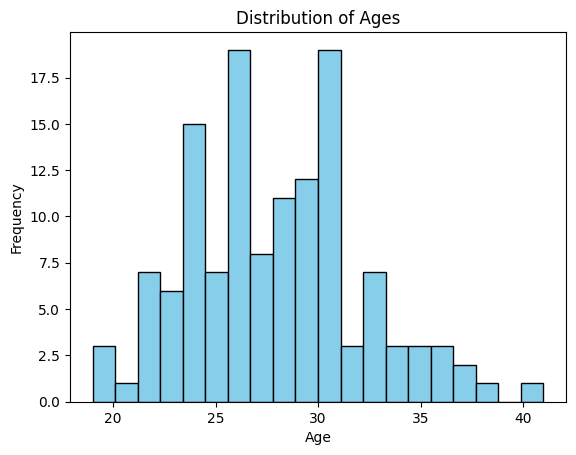

In [32]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor= "black")
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Average Attack by Position

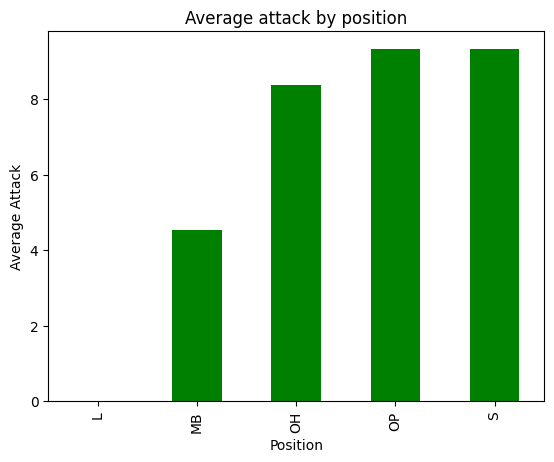

In [34]:
avg_attack_by_position= df.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending=True). plot(kind="bar", color="green")
avg_attack_by_position.plot(kind="bar", color="green")
plt.title("Average attack by position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

Serve Trend by Age

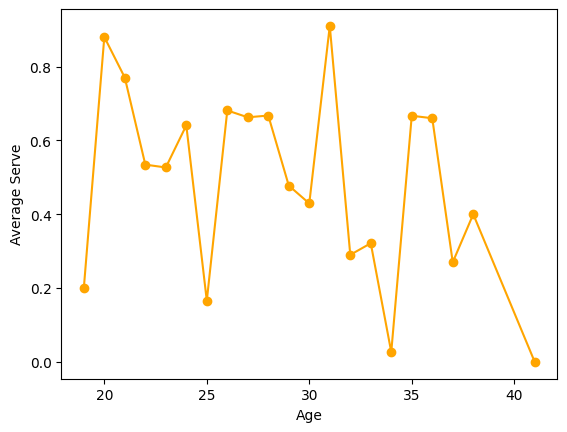

In [38]:
serve_trend_by_age=df.groupby("Age")["Serve"].mean()
serve_trend_by_age.plot(kind="line", marker='o', linestyle="-", color="orange")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

 Total Attack and Block by Country

In [39]:
total_attack_block_by_country=df.groupby("Country")[["Attack","Block"]].sum()
total_attack_block_by_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


Total Attack and Block by Country Bar Chart

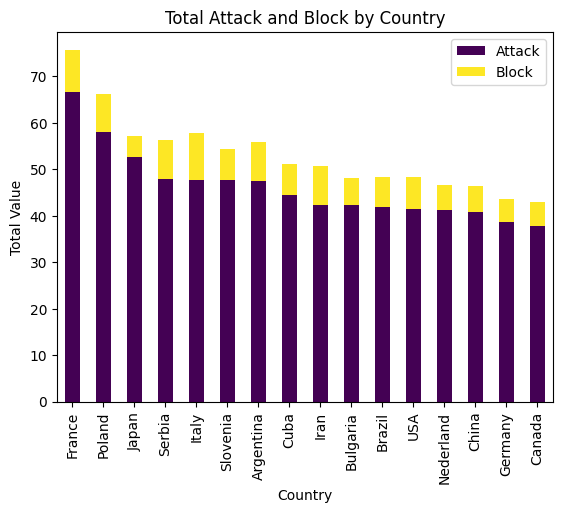

In [42]:
total_attack_block_by_country.sort_values(ascending=False,by="Attack").plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()